In [1]:
import pandas as pd
import numpy as np
import random
import string

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, RocCurveDisplay, plot_confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from numpy import arange, argmax
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from numpy import mean

import matplotlib.pyplot as plt
%matplotlib inline


pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_colwidth", None)

## Load the data

In [2]:
df_sample = pd.read_csv("sample_all_v2.csv")
df_sample.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
df_sample["prepayment_status_unique"].value_counts()

0    10962
1     2437
Name: prepayment_status_unique, dtype: int64

In [4]:
df = pd.read_csv("all_files_v2.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.head()

,customer_id,account_id,open_date_,original_principal_min,original_principal_max,original_principal_std,original_principal_max_minus_min,reporting_date_count,total_cust_exposure_min,total_cust_exposure_max,overdraft_min,overdraft_max,overdraft_size,overdraft_count0,overdraft_count1,overdraft_count2plus,consumer_loan_min,consumer_loan_max,consumer_loan_size,consumer_loan_count0,consumer_loan_count1,consumer_loan_count2plus,credit_card_min,credit_card_max,credit_card_size,credit_card_count0,credit_card_count1,credit_card_count2plus,customer_rating_min,customer_rating_max,customer_rating_modeX,maturity_date_min,maturity_date_max,maturity_date_max_minus_min,prepayment_status_unique,l_period_min,l_period_max,l_period_max_minus_min,interest_rate_min,interest_rate_max,interest_rate_max_minus_min,interest_rate_modeX,exp_monthly_payments_min,exp_monthly_payments_max,exp_monthly_payments_std,exp_monthly_payments_max_minus_min,current_principal_min,current_principal_max,current_principal_max_minus_min,interest_payment_min,interest_payment_max,interest_payment_max_minus_min,principal_payment_min,principal_payment_max,principal_payment_max_minus_min,deducted_principal_min,deducted_principal_max,deducted_principal_max_minus_min,deducted_vs_principal_payment_min,deducted_vs_principal_payment_max,deducted_vs_principal_payment_mean,deducted_vs_principal_payment_max_minus_min,principal_left_pctg_min,principal_left_pctg_max,principal_left_pctg_max_minus_min,collateral_id,market_value,collateral_type_M100,collateral_type_M101,collateral_type_M102,collateral_type_M103,collateral_type_M104,collateral_type_M105,town_Big,town_Capital,town_Major,town_Medium_Size,building_type_full,mortgage_utilisation_full,area_full,tot_mnth_income_full,gross_salary_full,profession_full,maritial_status_A49_full,maritial_status_I63_full,maritial_status_K16_full,maritial_status_M45_full,maritial_status_O32_full,maritial_status_Q37_full,maritial_status_U67_full,age_A788_full,age_F953_full,age_G219_full,age_H294_full,age_J454_full,age_M764_full,age_O456_full,age_P508_full,age_Q251_full,age_S205_full,age_T555_full,age_W677_full,age_X693_full,age_Z829_full,empl_type_A350_full,empl_type_C288_full,empl_type_H787_full,empl_type_I508_full,empl_type_L320_full,empl_type_P115_full,empl_type_Q237_full,empl_type_R412_full,empl_type_U768_full,empl_type_Y735_full,salary_principal_ratio,salary_total_cust_exposure_ratio,tot_income_principal_ratio,tot_income_cust_exposure_ratio,salary_tot_income_ratio
0,0x000100F424893C746F,0xF7CDAD654B6CE06334F9FE655212AAD1,2017-06-29,64800,64800,0.0,0,44,56155,63355,0,0,44,44,0,0,0,0,44,44,0,0,0,0,44,44,0,0,3.0,5.5,3.5,2042-06-29,2042-06-29,0,0,24,24,0,3.70,3.70,0.0,3.70,339.819283,339.819283,0.0,0.0,56155,62342,6187,173.144583,192.221167,19.076583,147.598116,166.674700,19.076583,0.0,2458.0,2458.0,-164.251200,2310.401884,39.390899,2474.653083,87.0,96.0,9.0,0xA1224902A54E10483EBEEFC973,72360,1,0,0,0,0,0,0,0,0,1,1.0,1.0,47.568,660.0,888.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014244,0.014016,0.010587,0.010417,0.014016
1,0x000224F02B4B39DDFE,0x5568E6E4AEB2DF832D6444950125EECB,2016-08-16,74880,74880,0.0,0,11,70449,72710,0,0,11,11,0,0,0,0,11,11,0,0,0,0,11,11,0,0,4.0,5.5,4.0,2042-08-16,2042-08-16,0,1,25,25,0,3.90,3.90,0.0,3.90,391.121433,391.121433,0.0,0.0,69729,71273,1544,226.619250,231.637250,5.018000,159.484183,164.502183,5.018000,147.0,3607.0,3460.0,-12.961933,3447.515817,306.287522,3460.477750,93.0,95.0,2.0,0x5A1DD802DAC694B446F8C6161B,93600,1,0,0,0,0,0,1,0,0,0,1.0,1.0,81.180,1487.0,0.0,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.020863,0.020451,0.000000
2,0x00025DA4C145ED8EBF,0x8C794E5D7336C4FE59B85E4400973723,2022-04-13,54000,54000,0.0,0,3,53248,54000,0,0,3,3,0,0,0,0,3,3,0,0,0,0,3,3,0,0,5.5,5.5,5.5,2033-04-13,2033-04-13,0,0,11,11,0,2.48,2.48,0.0,2.48,467.84

## Explore data

In [6]:
df["deducted_principal_min"].value_counts()

 0.0         30875
 177.0          27
 119.0          27
 146.0          26
 185.0          25
             ...  
 16290.0         1
-22824.0         1
-32903.0         1
-52407.0         1
 263088.0        1
Name: deducted_principal_min, Length: 3993, dtype: int64

In [7]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40602 entries, 0 to 40601
Data columns (total 119 columns):
 #    Column                                       Non-Null Count  Dtype  
---   ------                                       --------------  -----  
 0    customer_id                                  40602 non-null  object 
 1    account_id                                   40602 non-null  object 
 2    open_date_                                   40602 non-null  object 
 3    original_principal_min                       40602 non-null  int64  
 4    original_principal_max                       40602 non-null  int64  
 5    original_principal_std                       40602 non-null  float64
 6    original_principal_max_minus_min             40602 non-null  int64  
 7    reporting_date_count                         40602 non-null  int64  
 8    total_cust_exposure_min                      40602 non-null  int64  
 9    total_cust_exposure_max                      40602 non-null

In [8]:
df.head()

,customer_id,account_id,open_date_,original_principal_min,original_principal_max,original_principal_std,original_principal_max_minus_min,reporting_date_count,total_cust_exposure_min,total_cust_exposure_max,overdraft_min,overdraft_max,overdraft_size,overdraft_count0,overdraft_count1,overdraft_count2plus,consumer_loan_min,consumer_loan_max,consumer_loan_size,consumer_loan_count0,consumer_loan_count1,consumer_loan_count2plus,credit_card_min,credit_card_max,credit_card_size,credit_card_count0,credit_card_count1,credit_card_count2plus,customer_rating_min,customer_rating_max,customer_rating_modeX,maturity_date_min,maturity_date_max,maturity_date_max_minus_min,prepayment_status_unique,l_period_min,l_period_max,l_period_max_minus_min,interest_rate_min,interest_rate_max,interest_rate_max_minus_min,interest_rate_modeX,exp_monthly_payments_min,exp_monthly_payments_max,exp_monthly_payments_std,exp_monthly_payments_max_minus_min,current_principal_min,current_principal_max,current_principal_max_minus_min,interest_payment_min,interest_payment_max,interest_payment_max_minus_min,principal_payment_min,principal_payment_max,principal_payment_max_minus_min,deducted_principal_min,deducted_principal_max,deducted_principal_max_minus_min,deducted_vs_principal_payment_min,deducted_vs_principal_payment_max,deducted_vs_principal_payment_mean,deducted_vs_principal_payment_max_minus_min,principal_left_pctg_min,principal_left_pctg_max,principal_left_pctg_max_minus_min,collateral_id,market_value,collateral_type_M100,collateral_type_M101,collateral_type_M102,collateral_type_M103,collateral_type_M104,collateral_type_M105,town_Big,town_Capital,town_Major,town_Medium_Size,building_type_full,mortgage_utilisation_full,area_full,tot_mnth_income_full,gross_salary_full,profession_full,maritial_status_A49_full,maritial_status_I63_full,maritial_status_K16_full,maritial_status_M45_full,maritial_status_O32_full,maritial_status_Q37_full,maritial_status_U67_full,age_A788_full,age_F953_full,age_G219_full,age_H294_full,age_J454_full,age_M764_full,age_O456_full,age_P508_full,age_Q251_full,age_S205_full,age_T555_full,age_W677_full,age_X693_full,age_Z829_full,empl_type_A350_full,empl_type_C288_full,empl_type_H787_full,empl_type_I508_full,empl_type_L320_full,empl_type_P115_full,empl_type_Q237_full,empl_type_R412_full,empl_type_U768_full,empl_type_Y735_full,salary_principal_ratio,salary_total_cust_exposure_ratio,tot_income_principal_ratio,tot_income_cust_exposure_ratio,salary_tot_income_ratio
0,0x000100F424893C746F,0xF7CDAD654B6CE06334F9FE655212AAD1,2017-06-29,64800,64800,0.0,0,44,56155,63355,0,0,44,44,0,0,0,0,44,44,0,0,0,0,44,44,0,0,3.0,5.5,3.5,2042-06-29,2042-06-29,0,0,24,24,0,3.70,3.70,0.0,3.70,339.819283,339.819283,0.0,0.0,56155,62342,6187,173.144583,192.221167,19.076583,147.598116,166.674700,19.076583,0.0,2458.0,2458.0,-164.251200,2310.401884,39.390899,2474.653083,87.0,96.0,9.0,0xA1224902A54E10483EBEEFC973,72360,1,0,0,0,0,0,0,0,0,1,1.0,1.0,47.568,660.0,888.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014244,0.014016,0.010587,0.010417,0.014016
1,0x000224F02B4B39DDFE,0x5568E6E4AEB2DF832D6444950125EECB,2016-08-16,74880,74880,0.0,0,11,70449,72710,0,0,11,11,0,0,0,0,11,11,0,0,0,0,11,11,0,0,4.0,5.5,4.0,2042-08-16,2042-08-16,0,1,25,25,0,3.90,3.90,0.0,3.90,391.121433,391.121433,0.0,0.0,69729,71273,1544,226.619250,231.637250,5.018000,159.484183,164.502183,5.018000,147.0,3607.0,3460.0,-12.961933,3447.515817,306.287522,3460.477750,93.0,95.0,2.0,0x5A1DD802DAC694B446F8C6161B,93600,1,0,0,0,0,0,1,0,0,0,1.0,1.0,81.180,1487.0,0.0,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.020863,0.020451,0.000000
2,0x00025DA4C145ED8EBF,0x8C794E5D7336C4FE59B85E4400973723,2022-04-13,54000,54000,0.0,0,3,53248,54000,0,0,3,3,0,0,0,0,3,3,0,0,0,0,3,3,0,0,5.5,5.5,5.5,2033-04-13,2033-04-13,0,0,11,11,0,2.48,2.48,0.0,2.48,467.84

## Data Splitting

In [9]:
X = df.loc[:, ~df.columns.isin(['prepayment_status_unique'])]
Y = df["prepayment_status_unique"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=24)

In [11]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data.sort_index(inplace=True)

In [12]:
X_train.sort_index(inplace=True)
y_train.sort_index(inplace=True)
train_data = pd.concat([X_train, y_train], axis=1)

In [13]:
train_data.head()

,customer_id,account_id,open_date_,original_principal_min,original_principal_max,original_principal_std,original_principal_max_minus_min,reporting_date_count,total_cust_exposure_min,total_cust_exposure_max,overdraft_min,overdraft_max,overdraft_size,overdraft_count0,overdraft_count1,overdraft_count2plus,consumer_loan_min,consumer_loan_max,consumer_loan_size,consumer_loan_count0,consumer_loan_count1,consumer_loan_count2plus,credit_card_min,credit_card_max,credit_card_size,credit_card_count0,credit_card_count1,credit_card_count2plus,customer_rating_min,customer_rating_max,customer_rating_modeX,maturity_date_min,maturity_date_max,maturity_date_max_minus_min,l_period_min,l_period_max,l_period_max_minus_min,interest_rate_min,interest_rate_max,interest_rate_max_minus_min,interest_rate_modeX,exp_monthly_payments_min,exp_monthly_payments_max,exp_monthly_payments_std,exp_monthly_payments_max_minus_min,current_principal_min,current_principal_max,current_principal_max_minus_min,interest_payment_min,interest_payment_max,interest_payment_max_minus_min,principal_payment_min,principal_payment_max,principal_payment_max_minus_min,deducted_principal_min,deducted_principal_max,deducted_principal_max_minus_min,deducted_vs_principal_payment_min,deducted_vs_principal_payment_max,deducted_vs_principal_payment_mean,deducted_vs_principal_payment_max_minus_min,principal_left_pctg_min,principal_left_pctg_max,principal_left_pctg_max_minus_min,collateral_id,market_value,collateral_type_M100,collateral_type_M101,collateral_type_M102,collateral_type_M103,collateral_type_M104,collateral_type_M105,town_Big,town_Capital,town_Major,town_Medium_Size,building_type_full,mortgage_utilisation_full,area_full,tot_mnth_income_full,gross_salary_full,profession_full,maritial_status_A49_full,maritial_status_I63_full,maritial_status_K16_full,maritial_status_M45_full,maritial_status_O32_full,maritial_status_Q37_full,maritial_status_U67_full,age_A788_full,age_F953_full,age_G219_full,age_H294_full,age_J454_full,age_M764_full,age_O456_full,age_P508_full,age_Q251_full,age_S205_full,age_T555_full,age_W677_full,age_X693_full,age_Z829_full,empl_type_A350_full,empl_type_C288_full,empl_type_H787_full,empl_type_I508_full,empl_type_L320_full,empl_type_P115_full,empl_type_Q237_full,empl_type_R412_full,empl_type_U768_full,empl_type_Y735_full,salary_principal_ratio,salary_total_cust_exposure_ratio,tot_income_principal_ratio,tot_income_cust_exposure_ratio,salary_tot_income_ratio,prepayment_status_unique
0,0x000100F424893C746F,0xF7CDAD654B6CE06334F9FE655212AAD1,2017-06-29,64800,64800,0.0,0,44,56155,63355,0,0,44,44,0,0,0,0,44,44,0,0,0,0,44,44,0,0,3.0,5.5,3.5,2042-06-29,2042-06-29,0,24,24,0,3.70,3.70,0.0,3.70,339.819283,339.819283,0.000000,0.000000,56155,62342,6187,173.144583,192.221167,19.076583,147.598116,166.674700,19.076583,0.0,2458.0,2458.0,-164.251200,2310.401884,39.390899,2474.653083,87.0,96.0,9.0,0xA1224902A54E10483EBEEFC973,72360,1,0,0,0,0,0,0,0,0,1,1.0,1.0,47.568,660.0,888.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014244,0.014016,0.010587,0.010417,0.014016,0
2,0x00025DA4C145ED8EBF,0x8C794E5D7336C4FE59B85E4400973723,2022-04-13,54000,54000,0.0,0,3,53248,54000,0,0,3,3,0,0,0,0,3,3,0,0,0,0,3,3,0,0,5.5,5.5,5.5,2033-04-13,2033-04-13,0,11,11,0,2.48,2.48,0.0,2.48,467.844781,467.844781,0.000000,0.000000,53248,54000,752,110.045867,111.600000,1.554133,356.244781,357.798915,1.554133,0.0,398.0,398.0,-356.244781,40.932685,-106.370337,397.177467,99.0,100.0,1.0,0xD744613939B2BCC38B45EC917E,80400,1,0,0,0,0,0,0,0,0,1,2.0,1.0,74.904,1663.0,780.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014444,0.014444,0.030796,0.030796,0.014444,0
4,0x0004EAC7528D4869C1,0x1DE89AAB80B0FE12FBA0E35F21DDA118,2021-07-07,118320,118320,0.0,0,12,95275,116897,0,0,12,12,0,0,0,0,12,12,0,0,0,0,12,12,0,0,3.0,3.9,3.9,2051-07-07,2051-07-07,0,29,29,0,2.49,2.

In [14]:
train_data.shape

(28421, 119)

In [15]:
test_data.head()

,customer_id,account_id,open_date_,original_principal_min,original_principal_max,original_principal_std,original_principal_max_minus_min,reporting_date_count,total_cust_exposure_min,total_cust_exposure_max,overdraft_min,overdraft_max,overdraft_size,overdraft_count0,overdraft_count1,overdraft_count2plus,consumer_loan_min,consumer_loan_max,consumer_loan_size,consumer_loan_count0,consumer_loan_count1,consumer_loan_count2plus,credit_card_min,credit_card_max,credit_card_size,credit_card_count0,credit_card_count1,credit_card_count2plus,customer_rating_min,customer_rating_max,customer_rating_modeX,maturity_date_min,maturity_date_max,maturity_date_max_minus_min,l_period_min,l_period_max,l_period_max_minus_min,interest_rate_min,interest_rate_max,interest_rate_max_minus_min,interest_rate_modeX,exp_monthly_payments_min,exp_monthly_payments_max,exp_monthly_payments_std,exp_monthly_payments_max_minus_min,current_principal_min,current_principal_max,current_principal_max_minus_min,interest_payment_min,interest_payment_max,interest_payment_max_minus_min,principal_payment_min,principal_payment_max,principal_payment_max_minus_min,deducted_principal_min,deducted_principal_max,deducted_principal_max_minus_min,deducted_vs_principal_payment_min,deducted_vs_principal_payment_max,deducted_vs_principal_payment_mean,deducted_vs_principal_payment_max_minus_min,principal_left_pctg_min,principal_left_pctg_max,principal_left_pctg_max_minus_min,collateral_id,market_value,collateral_type_M100,collateral_type_M101,collateral_type_M102,collateral_type_M103,collateral_type_M104,collateral_type_M105,town_Big,town_Capital,town_Major,town_Medium_Size,building_type_full,mortgage_utilisation_full,area_full,tot_mnth_income_full,gross_salary_full,profession_full,maritial_status_A49_full,maritial_status_I63_full,maritial_status_K16_full,maritial_status_M45_full,maritial_status_O32_full,maritial_status_Q37_full,maritial_status_U67_full,age_A788_full,age_F953_full,age_G219_full,age_H294_full,age_J454_full,age_M764_full,age_O456_full,age_P508_full,age_Q251_full,age_S205_full,age_T555_full,age_W677_full,age_X693_full,age_Z829_full,empl_type_A350_full,empl_type_C288_full,empl_type_H787_full,empl_type_I508_full,empl_type_L320_full,empl_type_P115_full,empl_type_Q237_full,empl_type_R412_full,empl_type_U768_full,empl_type_Y735_full,salary_principal_ratio,salary_total_cust_exposure_ratio,tot_income_principal_ratio,tot_income_cust_exposure_ratio,salary_tot_income_ratio,prepayment_status_unique
1,0x000224F02B4B39DDFE,0x5568E6E4AEB2DF832D6444950125EECB,2016-08-16,74880,74880,0.0,0,11,70449,72710,0,0,11,11,0,0,0,0,11,11,0,0,0,0,11,11,0,0,4.0,5.5,4.0,2042-08-16,2042-08-16,0,25,25,0,3.90,3.90,0.00,3.90,391.121433,391.121433,0.000000,0.000000,69729,71273,1544,226.619250,231.63725,5.018000,159.484183,164.502183,5.018000,147.0,3607.0,3460.0,-12.961933,3447.515817,306.287522,3460.477750,93.0,95.0,2.0,0x5A1DD802DAC694B446F8C6161B,93600,1,0,0,0,0,0,1,0,0,0,1.0,1.0,81.180,1487.00,0.00,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.020863,0.020451,0.000000,1
3,0x0003C2466FAE7F0BEA,0xAAD9093643AACB7C73D1DAB125D551FE,2018-05-08,93600,93600,0.0,0,44,87324,92598,0,0,44,44,0,0,0,0,44,44,0,0,0,0,44,44,0,0,3.0,6.5,3.5,2053-05-08,2053-05-08,0,35,35,0,3.35,3.35,0.00,3.35,378.749527,378.749527,0.000000,0.000000,87324,92598,5274,243.779500,258.50275,14.723250,120.246777,134.970027,14.723250,0.0,1002.0,1002.0,-133.096819,881.753223,15.045854,1014.850042,93.0,99.0,6.0,0x607DA1BAEA089087390CA4010D,211680,1,0,0,0,0,0,0,1,0,0,1.0,1.0,126.360,2443.00,3120.00,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033694,0.033694,0.026383,0.026383,0.033694,0
10,0x00125FAF68C8D3F3D9,0x5C4EBF7B50A9E689B2BF6005B71C9A06,2020-05-21,248932,248932,0.0,0,26,238298,248932,0,0,26,26,0,0,0,0,26,26,0,0,0,0,26,26,0,0,4.0,6.5,5.5,2050-05-21,2050-05-2

In [16]:
test_data.shape

(12181, 119)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28421 entries, 0 to 40601
Columns: 118 entries, customer_id to salary_tot_income_ratio
dtypes: float64(70), int64(42), object(6)
memory usage: 25.8+ MB


## Feature Selection (Drop unexplainable)

In [18]:
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28421 entries, 0 to 40601
Data columns (total 118 columns):
 #    Column                                       Non-Null Count  Dtype  
---   ------                                       --------------  -----  
 0    customer_id                                  28421 non-null  object 
 1    account_id                                   28421 non-null  object 
 2    open_date_                                   28421 non-null  object 
 3    original_principal_min                       28421 non-null  int64  
 4    original_principal_max                       28421 non-null  int64  
 5    original_principal_std                       28421 non-null  float64
 6    original_principal_max_minus_min             28421 non-null  int64  
 7    reporting_date_count                         28421 non-null  int64  
 8    total_cust_exposure_min                      28421 non-null  int64  
 9    total_cust_exposure_max                      28421 non-null

In [19]:
features_selected = [col for col in X_train.columns if col not in ["customer_id", 
                                                                   "account_id",
                                                                   "collateral_id",
                                                                   "open_date_", 
                                                                   "maturity_date_min", 
                                                                   "maturity_date_max",
                                                                   "maturity_date_max_minus_min",
                                                                  "original_principal_max_minus_min",
                                                                  "overdraft_size",
                                                                  "consumer_loan_size",
                                                                  "credit_card_size",
                                                                  "l_period_max_minus_min",
                                                                  "interest_rate_max_minus_min",
                                                                  "interest_rate_modeX",
                                                                  "exp_monthly_payments_max_minus_min",
                                                                  "exp_monthly_payments_std",
                                                                  "current_principal_max_minus_min",
                                                                  "current_principal_max",
                                                                  "current_principal_min",
                                                                  "interest_payment_min",
                                                                  "interest_payment_max",
                                                                  "interest_payment_max_minus_min",
                                                                  "principal_payment_min",
                                                                  "principal_payment_max",
                                                                  "principal_payment_max_minus_min",
                                                                  "deducted_principal_max_minus_min",
                                                                  "deducted_vs_principal_payment_max_minus_min",
                                                                  "principal_left_pctg_min",
                                                                  "principal_left_pctg_max",
                                                                  "principal_left_pctg_max_minus_min",
                                                                  "overdraft_count0",
                                                                  "consumer_loan_count0",
                                                                  "credit_card_count0",
                                                                 "reporting_date_count"]]

In [20]:
X_train_fs, X_test_fs = X_train[features_selected], X_test[features_selected]

## Non-linear Feature Generation

In [21]:
X_train_fs.columns

Index(['original_principal_min', 'original_principal_max',
       'original_principal_std', 'total_cust_exposure_min',
       'total_cust_exposure_max', 'overdraft_min', 'overdraft_max',
       'overdraft_count1', 'overdraft_count2plus', 'consumer_loan_min',
       'consumer_loan_max', 'consumer_loan_count1', 'consumer_loan_count2plus',
       'credit_card_min', 'credit_card_max', 'credit_card_count1',
       'credit_card_count2plus', 'customer_rating_min', 'customer_rating_max',
       'customer_rating_modeX', 'l_period_min', 'l_period_max',
       'interest_rate_min', 'interest_rate_max', 'exp_monthly_payments_min',
       'exp_monthly_payments_max', 'deducted_principal_min',
       'deducted_principal_max', 'deducted_vs_principal_payment_min',
       'deducted_vs_principal_payment_max',
       'deducted_vs_principal_payment_mean', 'market_value',
       'collateral_type_M100', 'collateral_type_M101', 'collateral_type_M102',
       'collateral_type_M103', 'collateral_type_M104', 'col

### Logarithmic

In [22]:
orig_cols = X_train_fs.columns

In [23]:
len(X_train_fs)

28421

In [24]:
np.log(-1)

C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\153577755.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan

In [25]:
for col in orig_cols:
    
    new_col_name = col + "_log"

    X_train_fs[new_col_name] = np.log(X_train[col])
    X_test_fs[new_col_name] = np.log(X_test_fs[col])

C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\251632858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fs[new_col_name] = np.log(X_train[col])
C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\251632858.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_fs[new_col_name] = np.log(X_test_fs[col])
C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\251632858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [26]:
X_train_fs.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28421 entries, 0 to 40601
Data columns (total 168 columns):
 #    Column                                  Non-Null Count  Dtype  
---   ------                                  --------------  -----  
 0    original_principal_min                  28421 non-null  int64  
 1    original_principal_max                  28421 non-null  int64  
 2    original_principal_std                  28421 non-null  float64
 3    total_cust_exposure_min                 28421 non-null  int64  
 4    total_cust_exposure_max                 28421 non-null  int64  
 5    overdraft_min                           28421 non-null  int64  
 6    overdraft_max                           28421 non-null  int64  
 7    overdraft_count1                        28421 non-null  int64  
 8    overdraft_count2plus                    28421 non-null  int64  
 9    consumer_loan_min                       28421 non-null  int64  
 10   consumer_loan_max                       2842

### Quadratic

In [27]:
for col in orig_cols:
    
    new_col_name = col + "_x2"

    X_train_fs[new_col_name] = X_train[col]**2
    X_test_fs[new_col_name] = X_test_fs[col]**2

C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\1718490486.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_fs[new_col_name] = X_train[col]**2
C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\1718490486.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_fs[new_col_name] = X_test_fs[col]**2
C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\1718490486.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Conside

### Reciprocal

In [28]:
for col in orig_cols:
    
    new_col_name = col + "_1/x"

    X_train_fs[new_col_name] = 1/X_train[col]
    X_test_fs[new_col_name] = 1/X_test_fs[col]

C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\2222183442.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_fs[new_col_name] = 1/X_train[col]
C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\2222183442.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_fs[new_col_name] = 1/X_test_fs[col]
C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\2222183442.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

### Exponential

In [29]:
np.exp(4)

54.598150033144236

In [30]:
for col in orig_cols:
    
    new_col_name = col + "_exp"

    X_train_fs[new_col_name] = np.exp(X_train[col])
    X_test_fs[new_col_name] = np.exp(X_test_fs[col])

C:\Users\Mitko\.conda\envs\ss2022\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\1698709377.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_fs[new_col_name] = np.exp(X_train[col])
C:\Users\Mitko\.conda\envs\ss2022\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\1698709377.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\1698709377.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_fs[new_col_name] = np.exp(X_train[col])
C:\Users\Mitko\.conda\envs\ss2022\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\1698709377.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_fs[new_col_name] = np.exp(X_test_fs[col])
C:\Users\Mitko\AppData\Local\Tem

### Square rooted

In [31]:
for col in orig_cols:
    
    new_col_name = col + "_sqrt"

    X_train_fs[new_col_name] = np.exp(X_train[col])
    X_test_fs[new_col_name] = np.exp(X_test_fs[col])

C:\Users\Mitko\.conda\envs\ss2022\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\870156064.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_fs[new_col_name] = np.exp(X_train[col])
C:\Users\Mitko\.conda\envs\ss2022\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\870156064.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

## Explore

In [32]:
X_train_fs.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28421 entries, 0 to 40601
Data columns (total 504 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    original_principal_min                   28421 non-null  int64  
 1    original_principal_max                   28421 non-null  int64  
 2    original_principal_std                   28421 non-null  float64
 3    total_cust_exposure_min                  28421 non-null  int64  
 4    total_cust_exposure_max                  28421 non-null  int64  
 5    overdraft_min                            28421 non-null  int64  
 6    overdraft_max                            28421 non-null  int64  
 7    overdraft_count1                         28421 non-null  int64  
 8    overdraft_count2plus                     28421 non-null  int64  
 9    consumer_loan_min                        28421 non-null  int64  
 10   consumer_loan_max               

## Feature Selection (Correlation)

In [33]:

# plt.figure(figsize=(35,20))
# plt.title('Correlation Matrix of the selected predictors')
# sns.heatmap(X_train_fs.corr(), annot=False)

# fig1 = plt.gcf()

# fig1.savefig('X_train_fs_corr_matrix2.png', dpi=1000, format="png")

# plt.show()



In [34]:
# remove = ["salary_tot_income_ratio",
#          "deducted_vs_principal_payment_max",
#          "deducted_vs_principal_payment_min",
#          "salary_tot_income_ratio",
#          "salary_total_cust_exposure_ratio",
#          "tot_income_principal_ratio",
#          "consumer_loan_count1",
#          "total_cust_exposure_min",
#          "l_period_min",
#          "tot_income_cust_exposure_ratio",
#          "original_principal_min",
#          "tot_income_principal_ratio",
#          "exp_monthly_payments_max",
#          "total_cust_exposure_min",
#          "credit_card_count1",
#          "exp_monthly_payments_min"]

In [35]:
cor_matrix = X_train_fs.corr().abs()
type(cor_matrix)

pandas.core.frame.DataFrame

In [36]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
type(upper_tri)

C:\Users\Mitko\AppData\Local\Temp\ipykernel_12660\2855609033.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


pandas.core.frame.DataFrame

In [37]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['original_principal_max', 'total_cust_exposure_max', 'consumer_loan_count1', 'deducted_vs_principal_payment_min', 'deducted_vs_principal_payment_max', 'salary_total_cust_exposure_ratio', 'tot_income_cust_exposure_ratio', 'salary_tot_income_ratio', 'original_principal_max_log', 'overdraft_max_log', 'overdraft_count1_log', 'overdraft_count2plus_log', 'consumer_loan_count1_log', 'credit_card_count1_log', 'customer_rating_min_log', 'customer_rating_max_log', 'customer_rating_modeX_log', 'l_period_min_log', 'l_period_max_log', 'exp_monthly_payments_max_log', 'deducted_vs_principal_payment_min_log', 'deducted_vs_principal_payment_max_log', 'building_type_full_log', 'mortgage_utilisation_full_log', 'profession_full_log', 'salary_principal_ratio_log', 'salary_total_cust_exposure_ratio_log', 'tot_income_cust_exposure_ratio_log', 'salary_tot_income_ratio_log', 'original_principal_max_x2', 'original_principal_std_x2', 'total_cust_exposure_max_x2', 'overdraft_min_x2', 'overdraft_max_x2', 'overdr

In [38]:
features_selected = [col for col in X_train_fs.columns if col not in to_drop]

In [39]:
X_train_fs = X_train_fs.drop(to_drop, axis=1)
X_test_fs = X_test_fs.drop(to_drop, axis=1)

In [40]:
# def get_redundant_pairs(df):
#     '''Get diagonal and lower triangular pairs of correlation matrix'''
#     pairs_to_drop = set()
#     cols = df.columns
#     for i in range(0, df.shape[1]):
#         for j in range(0, i+1):
#             pairs_to_drop.add((cols[i], cols[j]))
#     return pairs_to_drop

# def get_top_abs_correlations(df, n=5):
#     au_corr = df.corr().abs().unstack()
#     labels_to_drop = get_redundant_pairs(df)
#     au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
#     return au_corr[0:n]

# print("Top Absolute Correlations")
# print(get_top_abs_correlations(X_train_fs, 40))


In [41]:
# features_selected = [col for col in X_train.columns if col not in ["customer_id", 
#                                                                    "account_id",
#                                                                    "collateral_id",
#                                                                    "open_date_", 
#                                                                    "maturity_date_min", 
#                                                                    "maturity_date_max",
#                                                                    "maturity_date_max_minus_min",
#                                                                   "original_principal_max_minus_min",
#                                                                   "overdraft_size",
#                                                                   "consumer_loan_size",
#                                                                   "credit_card_size",
#                                                                   "l_period_max_minus_min",
#                                                                   "interest_rate_max_minus_min",
#                                                                   "interest_rate_modeX",
#                                                                   "exp_monthly_payments_max_minus_min",
#                                                                   "exp_monthly_payments_std",
#                                                                   "current_principal_max_minus_min",
#                                                                   "current_principal_max",
#                                                                   "current_principal_min",
#                                                                   "interest_payment_min",
#                                                                   "interest_payment_max",
#                                                                   "interest_payment_max_minus_min",
#                                                                   "principal_payment_min",
#                                                                   "principal_payment_max",
#                                                                   "principal_payment_max_minus_min",
#                                                                   "deducted_principal_max_minus_min",
#                                                                   "deducted_vs_principal_payment_max_minus_min",
#                                                                   "principal_left_pctg_min",
#                                                                   "principal_left_pctg_max",
#                                                                   "principal_left_pctg_max_minus_min",
#                                                                   "overdraft_count0",
#                                                                   "consumer_loan_count0",
#                                                                   "credit_card_count0",
#                                                                   "reporting_date_count",
#                                                                    "salary_tot_income_ratio",
#          "deducted_vs_principal_payment_max",
#          "deducted_vs_principal_payment_min",
#          "salary_tot_income_ratio",
#          "salary_total_cust_exposure_ratio",
#          "tot_income_principal_ratio",
#          "consumer_loan_count1",
#          "total_cust_exposure_min",
#          "l_period_min",
#          "tot_income_cust_exposure_ratio",
#          "original_principal_min",
#          "tot_income_principal_ratio",
#          "exp_monthly_payments_max",
#          "total_cust_exposure_min",
#          "credit_card_count1",
#          "exp_monthly_payments_min"
#                                                                   ]]

In [42]:
# X_train_fs, X_test_fs = X_train[features_selected], X_test[features_selected]

## Standardize features

In [43]:
X_train_fs.replace([np.inf, -np.inf], 0, inplace=True)
X_test_fs.replace([np.inf, -np.inf], 0, inplace=True)

In [44]:
X_train_fs.fillna(0, inplace=True)
X_test_fs.fillna(0, inplace=True)

In [45]:
X_train_fs.replace([np.nan], 0, inplace=True)
X_test_fs.replace([np.nan], 0, inplace=True)



In [46]:
X_train_fs.replace(["nan", "NaN"], 0, inplace=True)
X_test_fs.replace(["nan", "NaN"], 0, inplace=True)

In [47]:
# X_train_fs.info(verbose=True, show_counts=True)

In [48]:
# X_test_fs.loc[X_test_fs.isnull().any(axis=1)]

In [49]:
# X_train_fs.loc[X_train_fs.isnull().any(axis=1)].shape

### Standardize 

In [50]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train_fs)
X_train_scaled = pd.DataFrame(data=X_train_sc, columns=features_selected)
y_train_values = y_train.values.ravel()

C:\Users\Mitko\.conda\envs\ss2022\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Mitko\.conda\envs\ss2022\lib\site-packages\sklearn\utils\extmath.py:1000: RuntimeWarning: overflow encountered in square
  temp **= 2
C:\Users\Mitko\.conda\envs\ss2022\lib\site-packages\sklearn\utils\extmath.py:1006: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\Mitko\.conda\envs\ss2022\lib\site-packages\sklearn\utils\extmath.py:1006: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\Mitko\.conda\envs\ss2022\lib\site-packages\sklearn\preprocessing\_data.py:84: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2
C:\Users\Mitko\.conda\envs\ss2022\lib\site-packages\numpy\core\fromnum

In [51]:
X_train_scaled.dropna(axis=1, inplace=True)

In [52]:
X_test_sc = scaler.transform(X_test_fs)
X_test_scaled = pd.DataFrame(data=X_test_sc, columns=X_test_fs.columns)

C:\Users\Mitko\.conda\envs\ss2022\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [53]:
X_test_scaled.head()

,original_principal_min,original_principal_std,total_cust_exposure_min,overdraft_min,overdraft_max,overdraft_count1,overdraft_count2plus,consumer_loan_min,consumer_loan_max,consumer_loan_count2plus,credit_card_min,credit_card_max,credit_card_count1,credit_card_count2plus,customer_rating_min,customer_rating_max,customer_rating_modeX,l_period_min,l_period_max,interest_rate_min,interest_rate_max,exp_monthly_payments_min,exp_monthly_payments_max,deducted_principal_min,deducted_principal_max,deducted_vs_principal_payment_mean,market_value,collateral_type_M100,collateral_type_M101,collateral_type_M102,collateral_type_M103,collateral_type_M104,collateral_type_M105,town_Big,town_Capital,town_Major,town_Medium_Size,building_type_full,mortgage_utilisation_full,area_full,tot_mnth_income_full,gross_salary_full,profession_full,maritial_status_A49_full,maritial_status_I63_full,maritial_status_K16_full,maritial_status_M45_full,maritial_status_O32_full,maritial_status_Q37_full,maritial_status_U67_full,age_A788_full,age_F953_full,age_G219_full,age_H294_full,age_J454_full,age_M764_full,age_O456_full,age_P508_full,age_Q251_full,age_S205_full,age_T555_full,age_W677_full,age_X693_full,age_Z829_full,empl_type_A350_full,empl_type_C288_full,empl_type_H787_full,empl_type_I508_full,empl_type_L320_full,empl_type_P115_full,empl_type_Q237_full,empl_type_R412_full,empl_type_U768_full,empl_type_Y735_full,salary_principal_ratio,tot_income_principal_ratio,original_principal_min_log,original_principal_std_log,total_cust_exposure_min_log,total_cust_exposure_max_log,overdraft_min_log,consumer_loan_min_log,consumer_loan_max_log,consumer_loan_count2plus_log,credit_card_min_log,credit_card_max_log,credit_card_count2plus_log,interest_rate_min_log,interest_rate_max_log,exp_monthly_payments_min_log,deducted_principal_min_log,deducted_principal_max_log,deducted_vs_principal_payment_mean_log,market_value_log,collateral_type_M100_log,collateral_type_M101_log,collateral_type_M102_log,collateral_type_M103_log,collateral_type_M104_log,collateral_type_M105_log,...,credit_card_min_1/x,credit_card_max_1/x,credit_card_count2plus_1/x,l_period_min_1/x,l_period_max_1/x,exp_monthly_payments_min_1/x,deducted_principal_min_1/x,deducted_principal_max_1/x,deducted_vs_principal_payment_max_1/x,deducted_vs_principal_payment_mean_1/x,market_value_1/x,collateral_type_M100_1/x,collateral_type_M101_1/x,collateral_type_M102_1/x,collateral_type_M103_1/x,collateral_type_M104_1/x,collateral_type_M105_1/x,town_Big_1/x,town_Capital_1/x,town_Major_1/x,town_Medium_Size_1/x,area_full_1/x,tot_mnth_income_full_1/x,gross_salary_full_1/x,profession_full_1/x,maritial_status_A49_full_1/x,maritial_status_I63_full_1/x,maritial_status_K16_full_1/x,maritial_status_M45_full_1/x,maritial_status_O32_full_1/x,maritial_status_Q37_full_1/x,maritial_status_U67_full_1/x,age_A788_full_1/x,age_F953_full_1/x,age_G219_full_1/x,age_H294_full_1/x,age_J454_full_1/x,age_M764_full_1/x,age_O456_full_1/x,age_P508_full_1/x,age_Q251_full_1/x,age_S205_full_1/x,age_T555_full_1/x,age_W677_full_1/x,age_X693_full_1/x,age_Z829_full_1/x,empl_type_A350_full_1/x,empl_type_C288_full_1/x,empl_type_H787_full_1/x,empl_type_I508_full_1/x,empl_type_L320_full_1/x,empl_type_P115_full_1/x,empl_type_Q237_full_1/x,empl_type_R412_full_1/x,empl_type_U768_full_1/x,empl_type_Y735_full_1/x,original_principal_min_exp,original_principal_max_exp,original_principal_std_exp,total_cust_exposure_min_exp,total_cust_exposure_max_exp,overdraft_count1_exp,consumer_loan_count1_exp,consumer_loan_count2plus_exp,credit_card_count1_exp,credit_card_count2plus_exp,customer_rating_min_exp,customer_rating_max_exp,customer_rating_modeX_exp,l_period_min_exp,l_period_max_exp,interest_rate_min_exp,exp_monthly_payments_min_exp,exp_monthly_payments_max_exp,deducted_principal_min_exp,deducted_principal_max_exp,deducted_vs_principal_payment_min_exp,deducted_vs_principal_payment_max_exp,deducted_vs_principal_payment_mean_exp,market_value_exp,tot_mnth_income_full_exp,gross_salary_full

In [54]:
X_test_scaled.dropna(axis=1, inplace=True)

In [ ]:
# y_train.value_counts()

In [ ]:
# y_test.value_counts()

In [ ]:
# 2164 / (2164 + 9638)

In [ ]:
# 1 - 0.18335875275377056

## Modeling

### Random Forest

In [55]:
rf_clf = RandomForestClassifier(n_estimators=10, class_weight='balanced')

#### Test it with all data

In [56]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=13)
# evaluate model
scores = cross_val_score(rf_clf, X_train_scaled, y_train_values, scoring='roc_auc', cv=cv, n_jobs=-1,
                        error_score='raise')
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.897


In [57]:
rf_clf.fit(X_train_scaled, y_train_values)

RandomForestClassifier(class_weight='balanced', n_estimators=10)

In [58]:
y_pred_rf = rf_clf.predict(X_test_scaled)# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_rf)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_rf)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_rf)}')
print(f'Recall score: {recall_score(y_test,y_pred_rf)}')

Accuracy Score: 0.9384287004351038
Confusion Matrix: 
[[9912   23]
 [ 727 1519]]
Area Under Curve: 0.8369991991578386
Recall score: 0.6763134461264471


#### Feature importances

In [59]:
rf_clf.feature_importances_

array([7.93049854e-03, 1.17883388e-04, 2.00407527e-02, 8.48946013e-06,
       1.01275188e-03, 4.19898183e-04, 0.00000000e+00, 0.00000000e+00,
       1.13800117e-04, 0.00000000e+00, 0.00000000e+00, 8.49736987e-05,
       0.00000000e+00, 0.00000000e+00, 3.76526494e-03, 5.37759895e-03,
       4.67086760e-03, 7.80348212e-03, 4.27598586e-03, 3.89349317e-02,
       5.37899418e-02, 8.84879777e-03, 7.03280570e-03, 9.86897298e-02,
       1.85357405e-02, 1.73692037e-02, 7.06395701e-03, 6.47860136e-04,
       9.56499896e-04, 5.72000558e-05, 0.00000000e+00, 0.00000000e+00,
       5.39225938e-05, 1.12462220e-03, 6.24115186e-04, 7.53770827e-04,
       8.05352408e-04, 7.85613644e-04, 8.31818491e-04, 8.03824137e-03,
       6.76208807e-03, 7.77884304e-03, 5.01761429e-03, 1.18471403e-03,
       1.35392997e-04, 1.03636535e-03, 2.72126443e-04, 6.61173700e-05,
       2.14955827e-04, 1.16531064e-03, 5.38585640e-04, 4.02158977e-05,
       6.61947036e-04, 3.37211095e-04, 5.90515731e-04, 2.20336317e-05,
      

<AxesSubplot:>

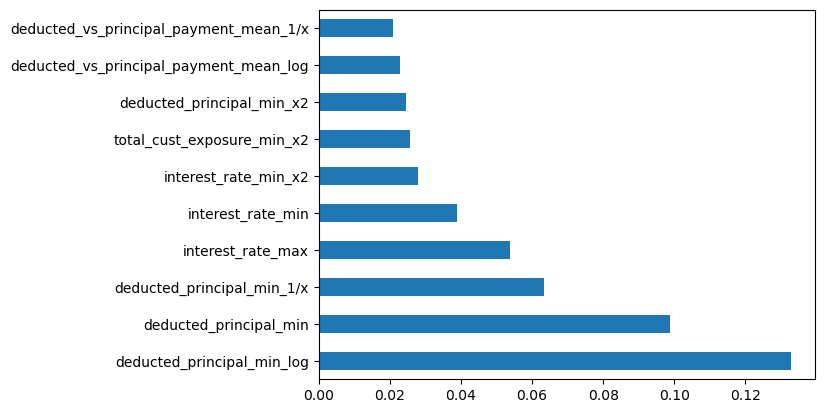

In [60]:
rf_feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train_scaled.columns)
rf_feat_importances.nlargest(10).plot(kind='barh')

In [61]:
rf_best_feat_importances = list(rf_feat_importances.nlargest(10).index)
rf_best_feat_importances

['deducted_principal_min_log',
 'deducted_principal_min',
 'deducted_principal_min_1/x',
 'interest_rate_max',
 'interest_rate_min',
 'interest_rate_min_x2',
 'total_cust_exposure_min_x2',
 'deducted_principal_min_x2',
 'deducted_vs_principal_payment_mean_log',
 'deducted_vs_principal_payment_mean_1/x']

## Decision Trees

### Default

In [62]:
# define model
tree_clf = DecisionTreeClassifier()

In [63]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(tree_clf, X_train_scaled, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.839


In [64]:
tree_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

Tree scores before removal of Correlated features:

- Accuracy Score: 0.9559149495115343
- Confusion Matrix: 
- [[9675  260]
-  [ 277 1969]]
- Area Under Curve: 0.9252497646097676
- Recall score: 0.8766696349065004

In [65]:
y_pred_tree1 = tree_clf.predict(X_test_scaled)# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_tree1)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_tree1)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_tree1)}')
print(f'Recall score: {recall_score(y_test,y_pred_tree1)}')

Accuracy Score: 0.8983663081848781
Confusion Matrix: 
[[9262  673]
 [ 565 1681]]
Area Under Curve: 0.8403506810295415
Recall score: 0.7484416740872663


### Using rf_best_features

In [ ]:
# define model
tree_clf2 = DecisionTreeClassifier()

In [ ]:
X_train_fs3, X_test_fs3 = X_train[rf_best_feat_importances], X_test[rf_best_feat_importances]

In [ ]:
scaler = StandardScaler()

X_train_sc3 = scaler.fit_transform(X_train_fs3)
X_train_scaled3 = pd.DataFrame(data=X_train_fs3, columns=rf_best_feat_importances)
y_train_values3 = y_train.values.ravel()

X_test_sc3 = scaler.transform(X_test_fs3)
X_test_scaled3 = pd.DataFrame(data=X_test_sc3, columns=X_test_fs3.columns)

In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(tree_clf2, X_train_scaled3, y_train_values, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
tree_clf2.fit(X_train_scaled3, y_train_values)

In [ ]:
y_pred_tree2 = tree_clf2.predict(X_test_scaled3)# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_tree2)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_tree2)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_tree2)}')
print(f'Recall score: {recall_score(y_test,y_pred_tree2)}')

## Plots

In [ ]:
# RocCurveDisplay.from_predictions(y_test, y_pred_rf)
RocCurveDisplay.from_predictions(y_test, y_pred_tree1)
# RocCurveDisplay.from_predictions(y_test, y_pred_tree2)
plt.show()

In [ ]:
# tree.plot_tree(tree_clf2, max_depth=5)
# plt.show()

In [ ]:
fig = plt.figure(figsize=(35,15))
_ = tree.plot_tree(tree_clf, 
                   feature_names=X_test_fs.columns,  
                   class_names=y_test.name,
                   filled=True,
                  max_depth=3)


In [ ]:
fig.savefig("decistion_tree1_filtered_features_STAT_FS_SCALED_Non_LIN_ALL8.png")

- If rule is True - Left, if False - Right
- we see the gini impurity before the split, the samples before the split and the majority class in that node


## Post Exploration

Когато deducted_principal_min е по - малко от 0, прогнозата е 0, иначе е 1

In [ ]:
X_train_scaled["deducted_principal_min"].describe()

In [ ]:
X_train_scaled["total_cust_exposure_min"].describe()

In [ ]:
float(1.000000e+00)